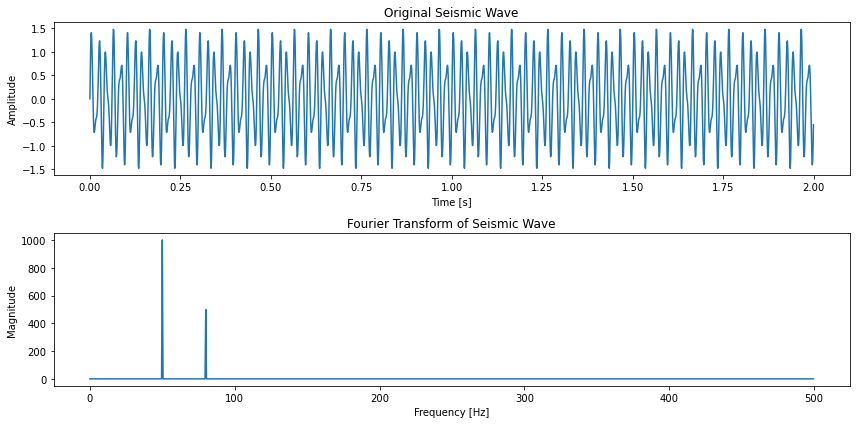

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Generate a synthetic seismic wave signal (replace this with your real data)
# For example, a simple combination of sine waves
duration = 2.0  # seconds
sampling_rate = 1000  # Hz
t = np.linspace(0.0, duration, int(sampling_rate * duration), endpoint=False)
# Create a sample seismic signal (replace this with your actual seismic data)
seismic_wave = np.sin(2.0 * np.pi * 50.0 * t) + 0.5 * np.sin(2.0 * np.pi * 80.0 * t)

# Apply Fourier Transform
N = len(seismic_wave)
yf = fft(seismic_wave)
xf = fftfreq(N, 1 / sampling_rate)

# Plot the original seismic wave
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, seismic_wave)
plt.title('Original Seismic Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the magnitude of the Fourier Transform
plt.subplot(2, 1, 2)
plt.plot(xf[:N // 2], np.abs(yf[:N // 2]))
plt.title('Fourier Transform of Seismic Wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


In [ ]:
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Load real seismic wave data from a CSV file
# Assuming the CSV file has a single column of amplitude values
data = np.loadtxt('your_seismic_data.csv')
seismic_wave = data[:, 0]  # adjust if needed

# The rest of the code remains the same
"""

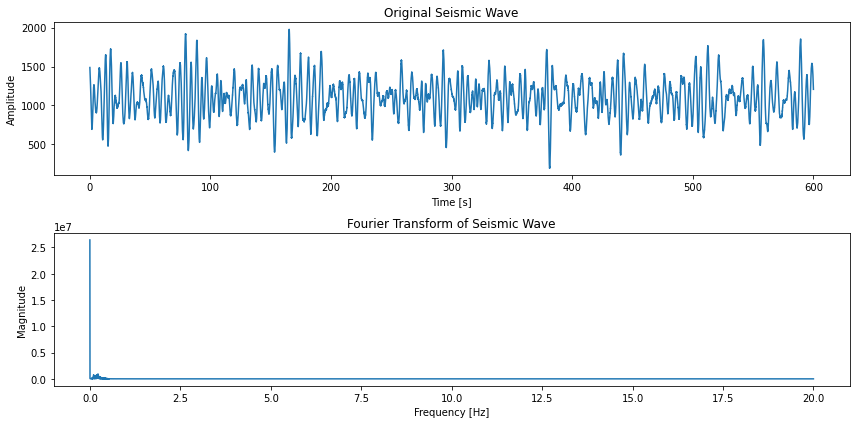

In [1]:
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np

# Initialize client to fetch data
client = Client("IRIS")

# Define the time range and station parameters for the seismic event
t = UTCDateTime("2020-01-01T00:00:00.000")
duration = 600  # duration in seconds

# Fetch waveform data
st = client.get_waveforms(network="IU", station="ANMO", location="00", channel="BH1", starttime=t, endtime=t + duration)

# Select the first trace in the stream
tr = st[0]

# Sampling rate and seismic wave data
sampling_rate = tr.stats.sampling_rate
seismic_wave = tr.data
N = len(seismic_wave)

# Apply Fourier Transform
yf = fft(seismic_wave)
xf = fftfreq(N, 1 / sampling_rate)

# Time array for plotting
time_array = np.arange(0, N) / sampling_rate

# Plot the original seismic wave
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_array, seismic_wave)
plt.title('Original Seismic Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the magnitude of the Fourier Transform
plt.subplot(2, 1, 2)
plt.plot(xf[:N // 2], np.abs(yf[:N // 2]))
plt.title('Fourier Transform of Seismic Wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()


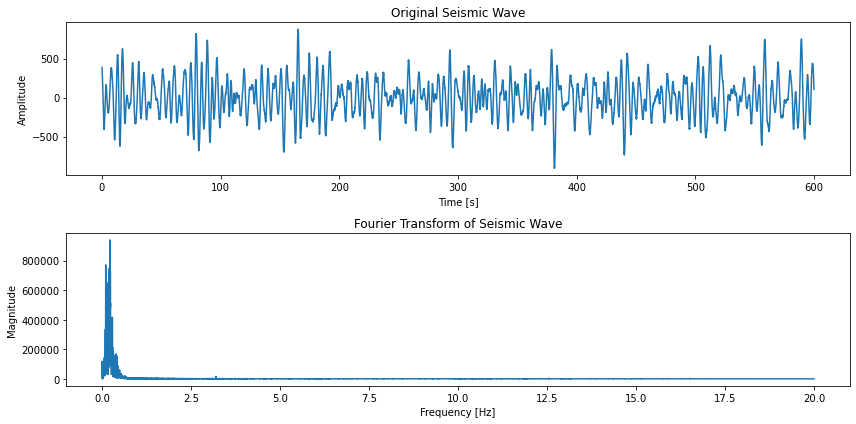

In [2]:
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np

# Initialize client to fetch data
client = Client("IRIS")

# Define the time range and station parameters for the seismic event
t = UTCDateTime("2020-01-01T00:00:00.000")
duration = 600  # duration in seconds

# Fetch waveform data
st = client.get_waveforms(network="IU", station="ANMO", location="00", channel="BH1", starttime=t, endtime=t + duration)

# Select the first trace in the stream
tr = st[0]

# Sampling rate and seismic wave data
sampling_rate = tr.stats.sampling_rate
seismic_wave = tr.data
N = len(seismic_wave)

# Remove mean to avoid the DC component in FFT
seismic_wave = seismic_wave - np.mean(seismic_wave)

# Apply Fourier Transform
yf = fft(seismic_wave)
xf = fftfreq(N, 1 / sampling_rate)

# Time array for plotting
time_array = np.arange(0, N) / sampling_rate

# Plot the original seismic wave
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time_array, seismic_wave)
plt.title('Original Seismic Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the magnitude of the Fourier Transform
plt.subplot(2, 1, 2)
plt.plot(xf[:N // 2], np.abs(yf[:N // 2]))
plt.title('Fourier Transform of Seismic Wave')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()
